<a href="https://colab.research.google.com/github/Nishidh25/IEEE-Coders-Week---ML/blob/master/Day%202/Social_Network_Ads_Clasification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Created on Tue Jun 02 13:03:59 2020

@author: Nishidh Shekhawat


# Task : Observe this given Dataset classify into what type of ML problem it is and train an ML model (Scikit Learn) to solve the problem

# Downloading the dataset - Social Network Ads

In [0]:
!wget http://iali.in/datasets/Social_Network_Ads.csv

--2020-06-02 09:49:17--  http://iali.in/datasets/Social_Network_Ads.csv
Resolving iali.in (iali.in)... 156.67.222.125
Connecting to iali.in (iali.in)|156.67.222.125|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10926 (11K) [text/plain]
Saving to: ‘Social_Network_Ads.csv.7’

Social_Network_Ads. 100%[===================>]  10.67K  --.-KB/s    in 0s      

2020-06-02 09:49:17 (186 MB/s) - ‘Social_Network_Ads.csv.7’ saved [10926/10926]



# Imports

In [0]:
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR') # Warinings will be ignored and won't be displayed
import pandas as pd

# Exploring the data

In [0]:
dataset = pd.read_csv('Social_Network_Ads.csv')
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


# The given problem is **Classification Problem**

# Dimentionality Reduction
We observe that Gender Age EstimatedSalary -> Purchased which is harder to visualize , so we ignore Gender

Age EstimatedSalary -> Purchased

* We will consider only Age and Estimatedsallary as independent variables.
* Purchased (1/0) is the dependent variable.

We will extract the relevant vectors from our dataset: the independent variables (X) and the dependent variable (y). 

In [0]:
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

# For visualization
print("X",X[:5, :])
print("y",y[:5])

X [[   19 19000]
 [   35 20000]
 [   26 43000]
 [   27 57000]
 [   19 76000]]
y [0 0 0 0 0]


# Splitting the dataset into the Training set and Test set

75% training , 25% Test 

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
X_test_orig = X_test # Copy for later predictions

# Normalizing Data / Feature scaling

In [0]:
from sklearn.preprocessing import StandardScaler
# Standard Scaler  z = (x - u) / s , data mean becomes 0 , 68% values [-1, 1]

sc = StandardScaler() 
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# For visualization
print("X Train : ", X_train[:5])
print("X Train : ", X_test[:5])

X Train :  [[ 0.58164944 -0.88670699]
 [-0.60673761  1.46173768]
 [-0.01254409 -0.5677824 ]
 [-0.60673761  1.89663484]
 [ 1.37390747 -1.40858358]]
X Train :  [[-0.80480212  0.50496393]
 [-0.01254409 -0.5677824 ]
 [-0.30964085  0.1570462 ]
 [-0.80480212  0.27301877]
 [-0.30964085 -0.5677824 ]]


# Building a Model 
Testing and Training 3 models and selecting the best one for our dataset

Chosing 3 classifiers: 
1. Logistic Regression 
2. K-Nearest Neighbors (KNN)
3. Support Vector Machines (SVM)



In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

classifier_lr = LogisticRegression(random_state = 0, solver='lbfgs')
classifier_knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier_svm = SVC(kernel='rbf',random_state=0)

# Training Classifiers with Train data 
classifier_lr.fit(X_train, y_train)
classifier_knn.fit(X_train, y_train)
classifier_svm.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

Predicting results of the classifier

In [0]:
y_pred_lr = classifier_lr.predict(X_test)
y_pred_knn = classifier_knn.predict(X_test)
y_pred_svm = classifier_svm.predict(X_test)

In [0]:
from sklearn.metrics import confusion_matrix

# returns score based on confusion matrix 
def score(matrix):
  return matrix[0][0]+ matrix[1][1]

cm_lr = confusion_matrix(y_test, y_pred_lr)
cm_knn = confusion_matrix(y_test, y_pred_knn)
cm_svm = confusion_matrix(y_test, y_pred_svm)

print("Score on test set - LR :", score(cm_lr), "% KNN :", score(cm_knn), "% SVM :", score(cm_svm),"%")

Score on test set - LR : 89 % KNN : 93 % SVM : 93 %


As we see from the results KNN and SVM give better results as compared to LR

# Visualizing Results **Train Set** 

In [0]:
from matplotlib.colors import ListedColormap

def visualize_train(name):
  if name == 'lr':
    classifier = classifier_lr
  elif name == 'knn':
    classifier = classifier_knn
  elif name == 'svm':
    classifier = classifier_svm
  else: print("Invalid input")

  X_set, y_set = X_train, y_train
  X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                      np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
  plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
              alpha = 0.75, cmap = ListedColormap(('red', 'green')))
  plt.xlim(X1.min(), X1.max())
  plt.ylim(X2.min(), X2.max())
  for i, j in enumerate(np.unique(y_set)):
      plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                  c = ListedColormap(('red', 'green'))(i), label = j)
  plt.title(name+' (Training set)')
  plt.xlabel('Age')
  plt.ylabel('Estimated Salary')
  plt.legend()
  plt.show()

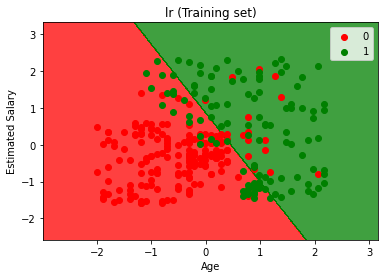

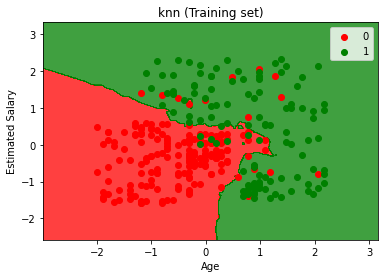

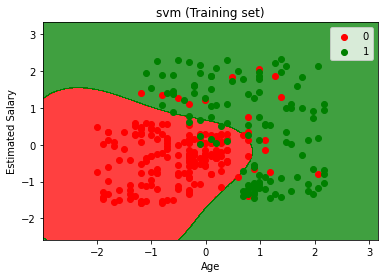

In [0]:
visualize_train('lr')
visualize_train('knn')
visualize_train('svm')

# Visualizing Results **Test Set** 

In [0]:
def visualize_test(name):
  if name == 'lr':
    classifier = classifier_lr
  elif name == 'knn':
    classifier = classifier_knn
  elif name == 'svm':
    classifier = classifier_svm
  else: print("Invalid input")
  X_set, y_set = X_test, y_test
  X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                      np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
  plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
              alpha = 0.75, cmap = ListedColormap(('red', 'green')))
  plt.xlim(X1.min(), X1.max())
  plt.ylim(X2.min(), X2.max())
  for i, j in enumerate(np.unique(y_set)):
      plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                  c = ListedColormap(('red', 'green'))(i), label = j)
  plt.title(name+' (Test set)')
  plt.xlabel('Age')
  plt.ylabel('Estimated Salary')
  plt.legend()
  plt.show()

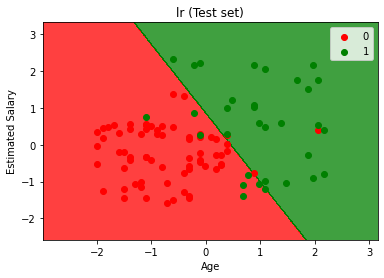

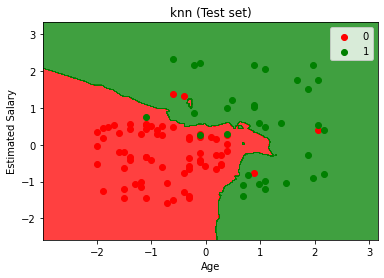

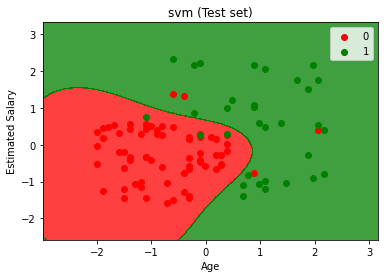

In [0]:
visualize_test('lr')
visualize_test('knn')
visualize_test('svm')

Incorrect predictions using Logistic Regression - 11

Incorrect predictions using K-NN model - 7 

Incorrect predictions using SVM - 7 

## We can observe from the results that **SVM is the best fit** for this data set due to much **more smoother** curve than K-NN.

# Prediction
 
Function to predict if user will purchase or not , based on age and estimated sallary

In [0]:
def predict(name):
  if name == 'lr':
    classifier = classifier_lr
  elif name == 'knn':
    classifier = classifier_knn
  elif name == 'svm':
    classifier = classifier_svm
  else: print("Invalid input")
 
  a = int(input("Age : "))
  b = int(input("Sallary : "))
  X_input = np.array([[a,b]])
  X_input = np.vstack( (X_test_orig , X_input))
  X_input = sc.fit_transform(X_input)
  y_output = classifier.predict(X_input)
  if y_output[-1:] == 0 :
    print("Prediction : User won't purchase \u274c")
  else :  print("Prediction : User will purchase \u2714")

In [0]:
# lr , knn , svm classifiers 
predict("lr")

Age : 45
Sallary : 500000
Prediction : User will purchase ✔


In [0]:
# Note entering low sallary (0) and high age (50) will give output as "User will purchase ✔" 
# this is because the dataset dosn't have all cases , not a problem with training models
predict("svm")

Age : 25
Sallary : 100
Prediction : User won't purchase ❌


Created on Tue Jun 02 13:03:59 2020

@author: Nishidh Shekhawat
